# Proyecto 2-Parte II (core)
### Parte II: Preprocesamiento y Optimización
- Objetivo: Realizar el preprocesamiento de datos y la optimización de modelos de machine learning para el conjunto de datos seleccionado. La meta es elegir la técnica de machine learning más adecuada y optimizar sus hiperparámetros para obtener el mejor rendimiento posible.
### Instrucciones Detalladas
- Parte 1: Preprocesamiento de Datos
  - Limpieza de Datos:Tratar los valores nulos utilizando técnicas adecuadas (imputación, eliminación, etc.). Manejar los outliers mediante técnicas de filtrado o transformación.
  - Transformación de Columnas: Utilizar ColumnTransformer para aplicar transformaciones específicas a diferentes columnas.Realizar codificación de variables categóricas utilizando técnicas como One-Hot Encoding.Escalar las variables numéricas usando StandardScaler u otros métodos de normalización.
  - Creación de Pipelines: Crear pipelines utilizando Pipeline de sklearn para automatizar el preprocesamiento de datos y asegurar la reproducibilidad.Incluir todos los pasos de preprocesamiento en el pipeline.
- Parte 2: Selección de Técnica de Machine Learning
  - Entrenamiento Inicial: Entrenar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost, LGBM). Evaluar los modelos utilizando validación cruzada y seleccionar el modelo con el mejor rendimiento inicial.
  - Comparación de Modelos: Comparar los modelos utilizando métricas de rendimiento relevantes (exactitud, precisión, recall, F1-Score, ROC-AUC, etc.). Seleccionar la técnica de machine learning más adecuada basándose en las métricas y la naturaleza del problema.
- Parte 3: Optimización de Hiperparámetros
  - GridSearchCV: Implementar GridSearchCV para realizar una búsqueda exhaustiva de los mejores hiperparámetros para el modelo seleccionado.Definir el espacio de búsqueda para los hiperparámetros relevantes.
  - RandomizedSearchCV: Implementar RandomizedSearchCV para realizar una búsqueda aleatoria de los mejores hiperparámetros, especialmente útil si el espacio de búsqueda es grande.
  - Optuna: Implementar Optuna para una optimización avanzada de los hiperparámetros, aprovechando técnicas como la optimización bayesiana y el pruning.
  - Evaluación de Modelos Optimizados: Entrenar el modelo con los mejores hiperparámetros encontrados y evaluar su rendimiento en el conjunto de prueba. Comparar el rendimiento del modelo optimizado con el modelo inicial.
- Parte 4: Documentación y Entrega
  - Documentación del Proceso: Documentar todos los pasos del preprocesamiento, selección de técnica y optimización en un notebook de Jupyter. Incluir explicaciones detalladas y justificaciones para cada decisión tomada.
  - Subida a GitHub: Actualizar el repositorio de GitHub con los notebooks de preprocesamiento, selección de técnica y optimización. Incluir los resultados de la optimización y la comparación de modelos. Crear un tag de liberación (v2.0.0) para esta versión del proyecto.

***

## PARTE 1: Preprocesamiento de Datos

In [48]:
# para no mostrar mensajes en consola de los warnings
import warnings
warnings.filterwarnings('ignore')
# Import inicial, exploracion e imputacion
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocesamiento
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Entrenamiento, evaluacion
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import optuna

# Cargar el dataset y hacer un resumen
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [5]:
# Verificar el contendio del dataset
print("DESCRIBE:\n", df.describe())
print("SHAPE:\n", df.shape)
print("INFO:\n", df.info())
print("DTYPES:\n", df.dtypes)
print("CANTIDAD NULOS:", df.isnull().sum())
print("CANTIDAD DUPLICADOS:", df.duplicated().sum())

DESCRIBE:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   889.000000  889.000000  889.000000  889.000000  889.000000   
mean    446.000000    0.382452    2.311586   35.686355    0.524184   
std     256.998173    0.486260    0.834700   17.756733    1.103705   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     224.000000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   32.000000    0.000000   
75%     668.000000    1.000000    3.000000   54.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare    Embarked  
count  889.000000  889.000000  889.000000  
mean     0.382452   32.096681    2.535433  
std      0.806761   49.697504    0.792088  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.895800    2.000000  
50%      0.000000   14.454200    3.000000  
75%      0.000000   31.000000    3.000000  
max   

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch      Fare  \
27            28         0       1    Male  19.0      3      2  263.0000   
87            89         1       1  female  23.0      3      2  263.0000   
117          119         0       1    Male  24.0      0      1  247.5208   
257          259         1       1  female  35.0      0      0  512.3292   
298          300         1       1  female  50.0      0      1  247.5208   

     Embarked  
27          3  
87          3  
117         1  
257         1  
298         1  
Numeros de Outliers: 20
Verificamos de vuelta los valores imputados


<Axes: >

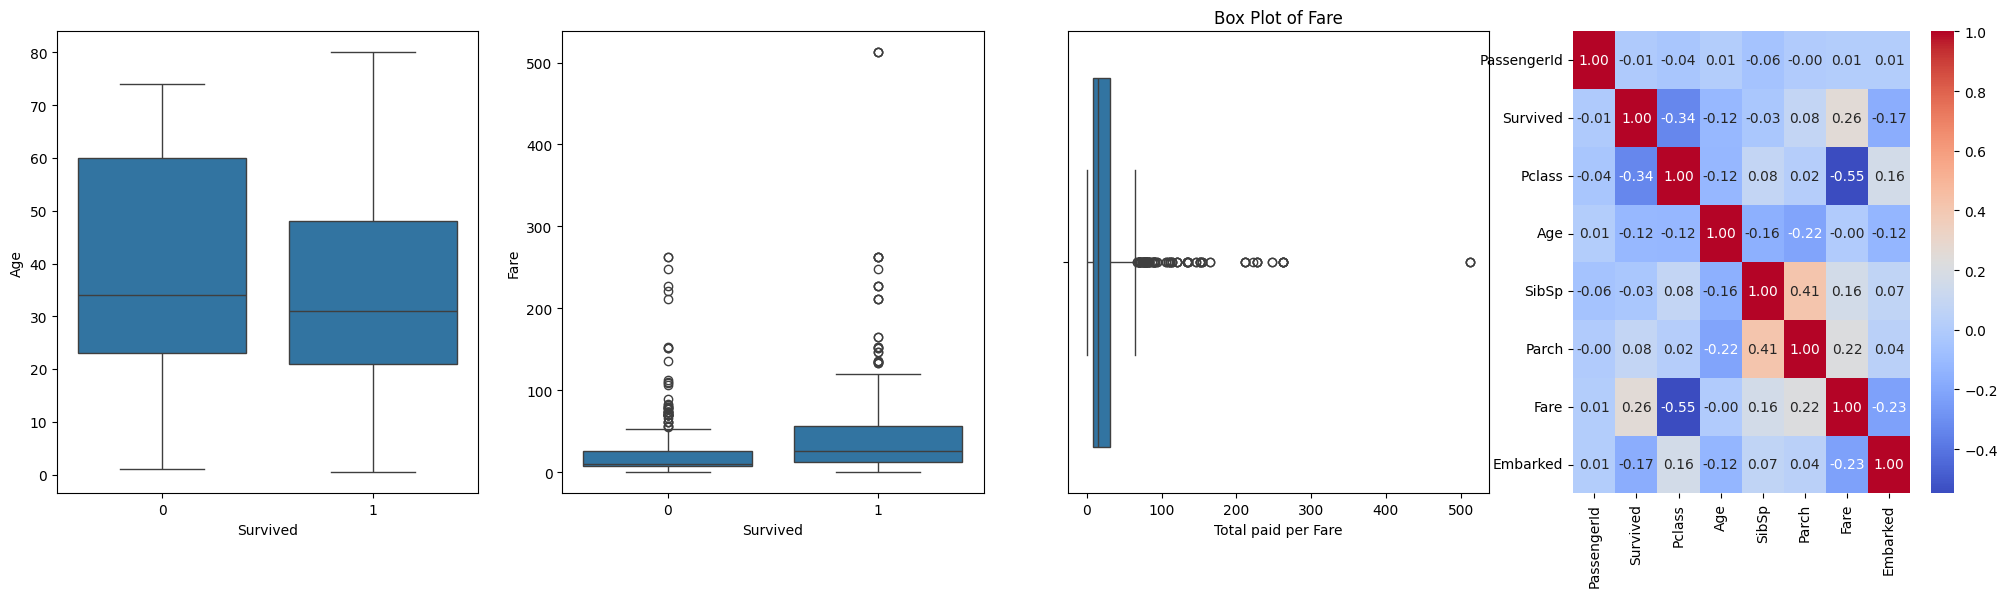

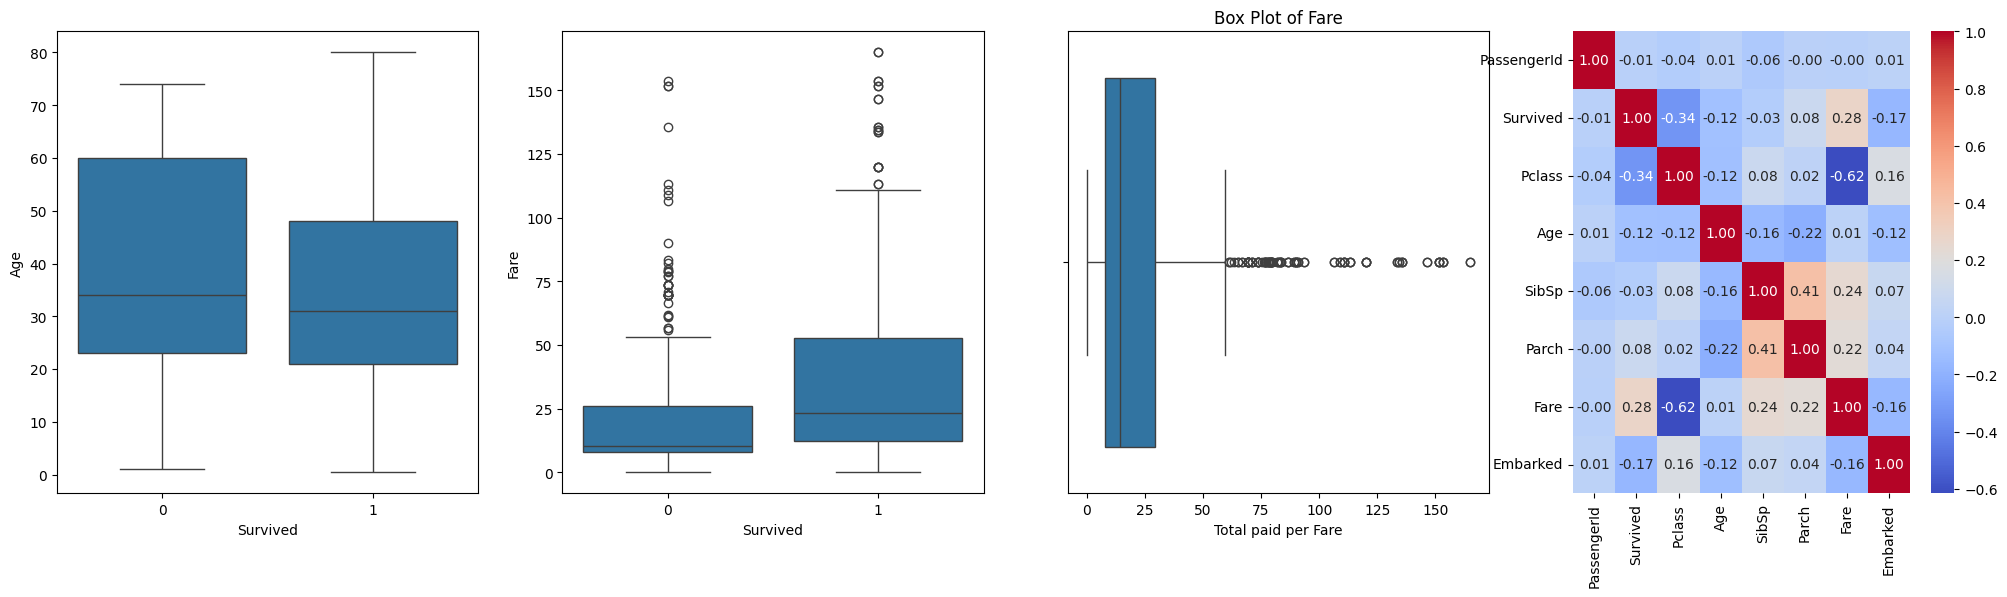

In [41]:
# Verificacion de outliers
figbi, axesbi = plt.subplots(1, 4, figsize=(25, 6))
sns.boxplot(x="Survived", y="Age", data=df,ax=axesbi[0])
sns.boxplot(x="Survived", y="Fare", data=df,ax=axesbi[1])
g = sns.boxplot(data=df, x = 'Fare', ax=axesbi[2])
g.set_title('Box Plot of Fare')
g.set_xlabel('Total paid per Fare')
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axesbi[3])


# identificamos que la columna 'Fare' tiene muchos outliers
# Un Z-Score, también conocido como puntuación Z, es una medida estadística que 
# indica cuántas desviaciones estándar un punto de datos específico está por encima o por debajo de la media del conjunto de datos.
#En este sentido, podemos calcular la puntuación Z de cada dato usando la función zscore de scipy y compararla con un umbral para 
# determinar qué valores son considerados atípicos. Por lo general se establece un umbral de 3, por lo que aquellos puntos de 
# datos cuya puntuación Z absoluta sea superior a 3 son outliers.
z_scores = zscore(df['Fare'])
abs_z_scores = np.abs(z_scores)

# Select the outliers using a threshold of 3
outliers = df[abs_z_scores > 3]
print(outliers.head())
print(f'Numeros de Outliers: {len(outliers)}')

# reemplazamos los valores outliers por la media
median_value = df['Fare'].median()

# Impute outliers with the median
df_imputed = df.copy()
df_imputed.loc[outliers.index, 'Fare'] = median_value

# Verificamos devuelta
print('Verificamos de vuelta los valores imputados')
figbi, axesbi = plt.subplots(1, 4, figsize=(25, 6))
sns.boxplot(x="Survived", y="Age", data=df_imputed,ax=axesbi[0])
sns.boxplot(x="Survived", y="Fare", data=df_imputed,ax=axesbi[1])
g = sns.boxplot(data=df_imputed, x = 'Fare', ax=axesbi[2])
g.set_title('Box Plot of Fare')
g.set_xlabel('Total paid per Fare')
numeric_df = df_imputed.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', ax=axesbi[3])

# 

In [42]:
# Transaformación de columnas
categorical_cols = ['Sex', 'Embarked']
numerical_cols = ['Age', 'Fare']

# ColumnTransformer. Definicion para las columnas categorias y numericas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # Apply One-Hot Encoding
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),          # Handle missing values
    ('scaler', StandardScaler())                          # Scale features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Crear un pipiline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Aplicar el pipeline al dataset (Excluyendo a la variable objetivo y al id del pasajero)
X = df_imputed.drop(columns=['Survived', 'PassengerId'], errors='ignore')
X_transformed = pipeline.fit_transform(X)

# Mostrar el dataSet transformado
transformed_columns = (
    numerical_cols +
    list(pipeline.named_steps['preprocessor']
        .named_transformers_['cat']
        .named_steps['onehot']
        .get_feature_names_out(categorical_cols))
)

X_transformed_df = pd.DataFrame(X_transformed, columns=transformed_columns)
print(X_transformed_df.head())

        Age      Fare  Sex_Male  Sex_female  Embarked_1  Embarked_2  \
0 -0.771204 -0.651792       1.0         0.0         0.0         0.0   
1  0.130370  1.557862       0.0         1.0         1.0         0.0   
2 -0.545810 -0.628499       0.0         1.0         0.0         0.0   
3 -0.038675  0.930395       0.0         1.0         0.0         0.0   
4 -0.038675 -0.624186       1.0         0.0         0.0         0.0   

   Embarked_3  
0         1.0  
1         0.0  
2         1.0  
3         1.0  
4         1.0  


***
### Parte 2: Selección de Técnica de Machine Learning

In [46]:
# Separating target variable and features
y = df_imputed['Survived']
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

# Defining models
modelos = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Training and evaluating models with cross-validation
nombre_modelo, result1, result2, result3, result4 = [], [], [], [], []
for nombre, modelo in modelos.items():
    cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
    modelo.fit(X_train, y_train)
    pre = modelo.predict(X_test)
    accuracy = accuracy_score(y_test, pre)
    recall = recall_score(y_test, pre, average='weighted')  # Cambia el promedio si lo necesitas
    f1 = f1_score(y_test, pre, average='weighted')
    nombre_modelo.append(nombre)
    result1.append(cv_scores.mean())
    result2.append(accuracy)
    result3.append(recall)
    result4.append(f1)

# Crear DataFrame con resultados
ResultadoFinal = pd.DataFrame({
    'Modelo': nombre_modelo,
    'Cv_Scores': result1,
    'Accuracies': result2,
    'Recall': result3,
    'FScore': result4
})

print(ResultadoFinal)

                Modelo  Cv_Scores  Accuracies    Recall    FScore
0  Logistic Regression   0.784812    0.797753  0.797753  0.799104
1  K-Nearest Neighbors   0.756722    0.758427  0.758427  0.758739
2        Decision Tree   0.730031    0.719101  0.719101  0.722666
3        Random Forest   0.765183    0.786517  0.786517  0.788597
4              XGBoost   0.775081    0.797753  0.797753  0.798711


***
### Parte 3: Optimización de Hiperparámetros

In [49]:
model = RandomForestClassifier(random_state=42)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo y sus parámetros
best_model = grid_search.best_estimator_
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [50]:
# Espacio de búsqueda ampliado
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': np.arange(2, 20, 2)
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Mejor modelo y sus parámetros
best_model_random = random_search.best_estimator_
print("Mejores parámetros (RandomizedSearch):", random_search.best_params_)

Mejores parámetros (RandomizedSearch): {'n_estimators': 160, 'min_samples_split': 12, 'max_depth': 10}


In [ ]:
# Definir la función objetivo para Optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

# Crear y optimizar el estudio
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Resultados del mejor modelo
print("Mejores parámetros (Optuna):", study.best_params)

[I 2024-11-25 11:47:15,227] A new study created in memory with name: no-name-b87b411d-e265-45ed-baf2-2cd4f13ee834
[I 2024-11-25 11:47:15,375] Trial 0 finished with value: 0.8033707865168539 and parameters: {'n_estimators': 133, 'max_depth': 29, 'min_samples_split': 17}. Best is trial 0 with value: 0.8033707865168539.
[I 2024-11-25 11:47:15,571] Trial 1 finished with value: 0.8033707865168539 and parameters: {'n_estimators': 191, 'max_depth': 28, 'min_samples_split': 14}. Best is trial 0 with value: 0.8033707865168539.
[I 2024-11-25 11:47:15,786] Trial 2 finished with value: 0.8033707865168539 and parameters: {'n_estimators': 125, 'max_depth': 13, 'min_samples_split': 15}. Best is trial 0 with value: 0.8033707865168539.
[I 2024-11-25 11:47:16,041] Trial 3 finished with value: 0.797752808988764 and parameters: {'n_estimators': 115, 'max_depth': 24, 'min_samples_split': 8}. Best is trial 0 with value: 0.8033707865168539.
[I 2024-11-25 11:47:16,283] Trial 4 finished with value: 0.803370786

Mejores parámetros (Optuna): {'n_estimators': 199, 'max_depth': 8, 'min_samples_split': 20}
